**Importing Libraries**
---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings as warn
warn.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [ ]:
data1=pd.read_csv('Part1 - Normal.csv')
data2=pd.read_csv('Part1 - Type_H.csv')
data3=pd.read_csv('Part1 - Type_S.csv')

In [ ]:
data1.shape

(100, 7)

In [ ]:
data2.shape

(60, 7)

In [ ]:
data3.shape

(150, 7)

**Merging three datasets into 1**

---



In [ ]:
df=pd.concat(map(pd.read_csv,['Part1 - Normal.csv','Part1 - Type_H.csv',"Part1 - Type_S.csv"]),ignore_index=True)
df.shape

(310, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [ ]:
df['Class'].unique()

array(['Normal', 'Nrmal', 'Type_H', 'type_h', 'Type_S', 'tp_s'],
      dtype=object)

**Replacing the incorrect class values to proper format**
---



In [ ]:
for i in range(len(df['Class'])):
  if (df['Class'][0:,][i])=='type_h':
    df['Class'][0:,][i]='Type_H'
  elif (df['Class'][0:,][i])=='tp_s':
    df['Class'][0:,][i]='Type_S' 
  elif (df['Class'][0:,][i])=='Nrmal':
    df['Class'][0:,][i]='Normal'  

In [ ]:
df['Class'].unique()

array(['Normal', 'Type_H', 'Type_S'], dtype=object)

In [ ]:
df.isna().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [ ]:
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


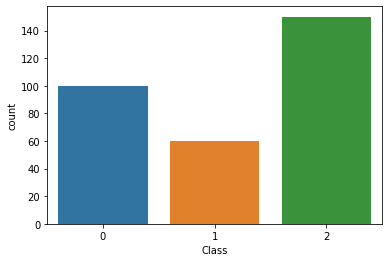

In [134]:
sns.countplot(x="Class",data=df)

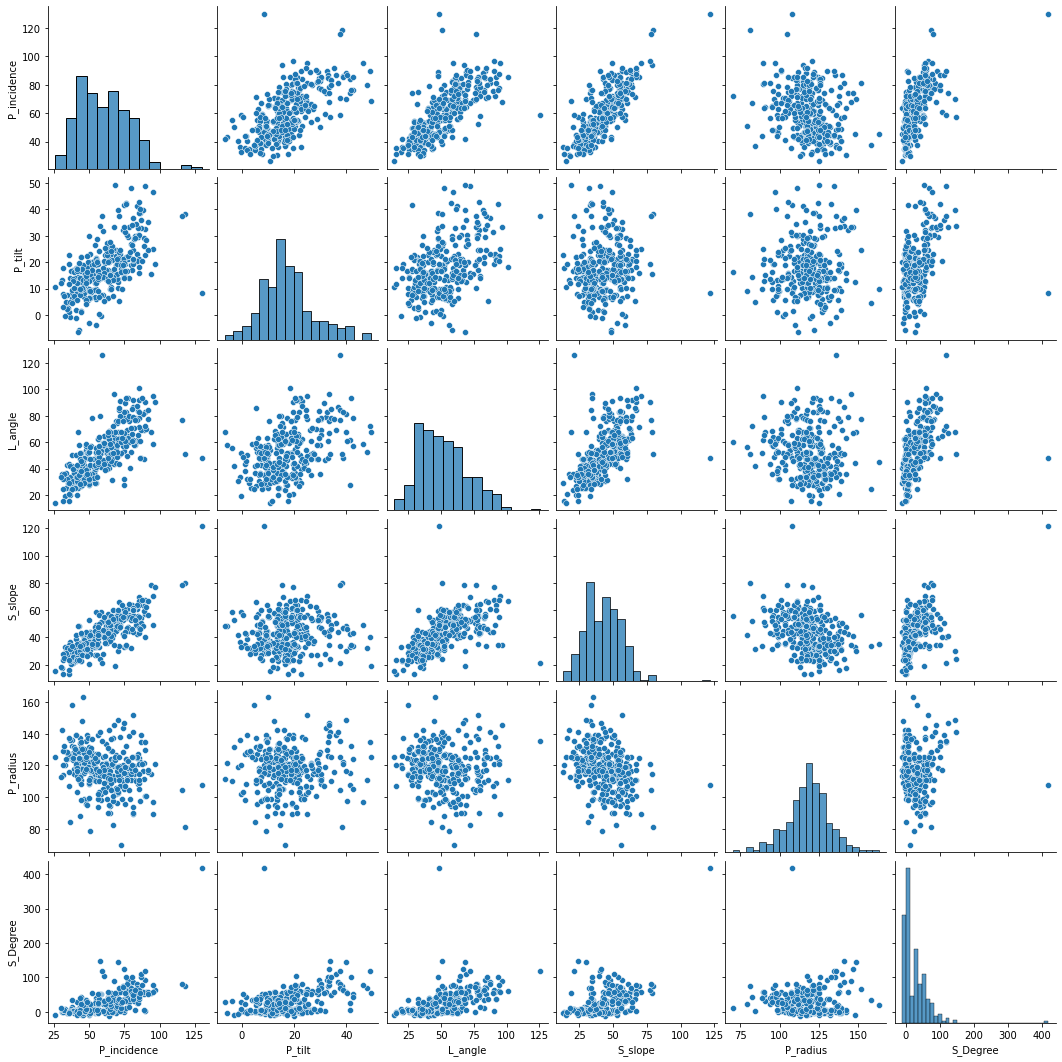

In [ ]:
sns.pairplot(df);

In [ ]:
df.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

**Analysing the distribution of independent columns based on the target variables.**

--- 



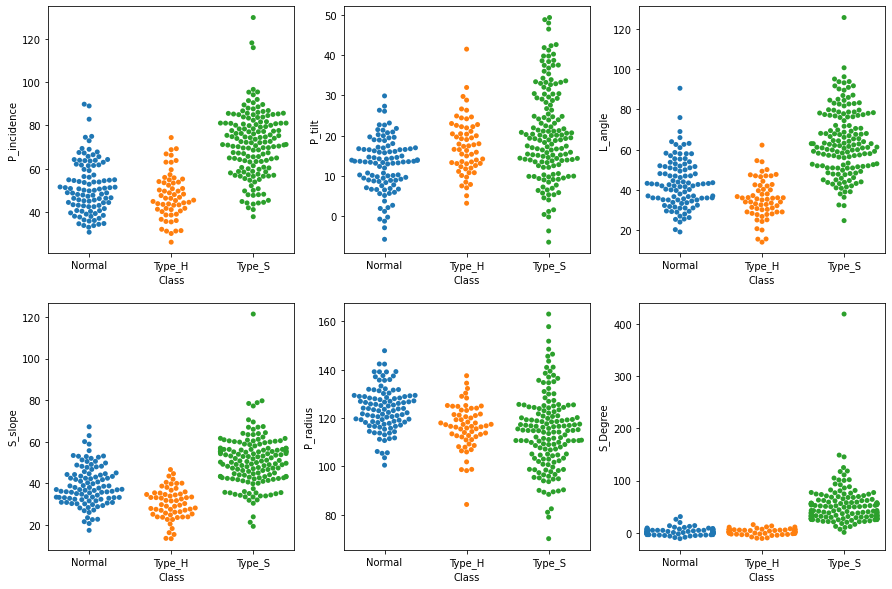

In [ ]:
columns=['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree']
plt.figure(figsize=(15,10))
for i in range(len(columns)):
    plt.subplot(2,3,i+1)
    sns.swarmplot(y=df[df.columns[i]],x="Class",data=df)

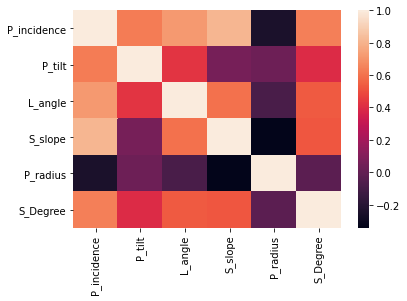

In [ ]:
corr=df.corr()
sns.heatmap(corr);

In [ ]:
df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


**Data pre-processing:**

---





In [ ]:
# Segregating predictors and target attributes
X=df.loc[:,:'S_Degree']
y=df.iloc[:,-1]

#Performing normalisation or scaling
df['Class'].value_counts(normalize=True)

# converting the target variable to one hot encoding (dummy-variables) for our analysis
from sklearn.preprocessing import LabelEncoder 
encode=LabelEncoder()
df['Class']=encode.fit_transform(df['Class'])

#Standardization of data
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler 
X_std=pd.DataFrame(StandardScaler().fit_transform(X))
X_std.columns=X.columns

#Splitting data into train dataset and test dataset
from sklearn.model_selection import train_test_split
y=df['Class']
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.25,random_state=20)



In [ ]:
print("X_train size",X_train.shape[0])
print("X_test size",X_test.shape[0])
print("y_train size",y_train.shape[0])
print("y_train size",y_test.shape[0])

X_train size 232
X_test size 78
y_train size 232
y_train size 78


**Model training, testing and tuning**

---



In [ ]:
#Build the model and train, test data for diifernt k values and finding the optimum k vlaue for our model
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

# making model for k=3
knn=KNC(n_neighbors=3)

#Fitting the model
knn.fit(X_train,y_train);

#Predicting the values
y_pred=knn.predict(X_test)

#Calculating Scores
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred,average='weighted'))
print(recall_score(y_test,y_pred,average='weighted'))

#Classification Report
print(classification_report(y_test,y_pred))

0.8333333333333334
0.8378846362717329
0.8333333333333334
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        28
           1       0.64      0.58      0.61        12
           2       0.97      0.92      0.95        38

    accuracy                           0.83        78
   macro avg       0.78      0.78      0.78        78
weighted avg       0.84      0.83      0.83        78



From the classification report we can derive the following conclusions:
1.   out of all the 3 classes we have the best precison for **Class 2**    which is 97% that we correctly predicted.
2.   out of all the 3 classes most positively predicted class is **Class 2**    with recall score of 92%.
3.   out of the all the positive predictions in all 3 classes we get the maximum F1 Score in case of **Class 2** with score of 95% 
4.   actual number of occurances is 28,12,38 for the **Class 0**, **Class 1** and **Class 2** respectively.

5.   we can also see that we get almost same value for **weighted average** in all the 3 scores calculated i.e around 83%


In [ ]:
# finding best values of K for KNN
test_Ks=list(range(1,20,2))

accuracy_scores=[]
for i in test_Ks:
  knn=KNC(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  accuracy_scores.append(accuracy_score(y_test,y_pred))

max_accuracy=max(accuracy_scores)
best_k_for_most_accuracy=test_Ks[accuracy_scores.index(max_accuracy)]
min_error=min(accuracy_scores)
best_k_for_least_error=test_Ks[accuracy_scores.index(min_error)]
miscalssfications=[1-i for i in accuracy_scores ]
print("best_k_for_most_accuracy is ",best_k_for_most_accuracy)
print("best_k_for_least_error is ",best_k_for_least_error)
print("best_k_for_least_misclassification_error is ",test_Ks[miscalssfications.index(min(miscalssfications))])

best_k_for_most_accuracy is  9
best_k_for_least_error is  5
best_k_for_least_misclassification_error is  9


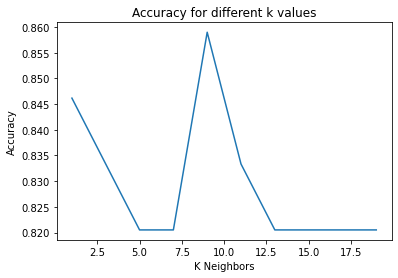

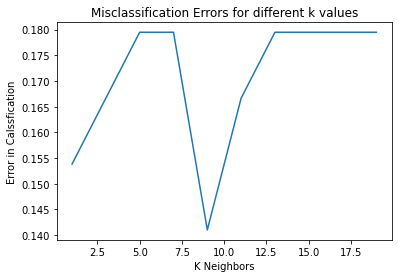

In [ ]:
# plotting for best k for most accuracy and least accuracy 
plt.plot(test_Ks,accuracy_scores)
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy')
plt.title("Accuracy for different k values")
plt.show()
plt.plot(test_Ks,miscalssfications)
plt.xlabel('K Neighbors')
plt.ylabel('Error in Calssfication')
plt.title("Misclassification Errors for different k values")
plt.show()

In [ ]:
# Using k=9 to make final model 
knn=KNC(n_neighbors=9);

#Fitting the model
knn.fit(X_train,y_train);

#Predicting the values
y_pred=knn.predict(X_test)

#Calculating Scores
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred,average='weighted'))
print(recall_score(y_test,y_pred,average='weighted'))

0.8589743589743589
0.8631609573254135
0.8589743589743589


A final observation we can see that the **accuracy ≈ precision ≈ recall** so we can state that K=9 is the perfect k for this model.

[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Type-H'), Text(0, 2.5, 'Type-S')]

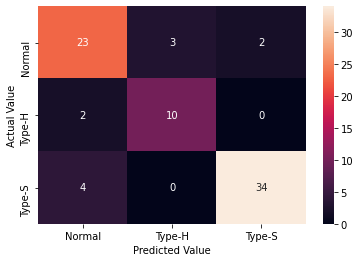

In [ ]:
# Drawing the confusion matrix.

matrix=confusion_matrix(y_test,y_pred);

ax=plt.subplot();
sns.heatmap(matrix,annot=True);
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value')
ax.xaxis.set_ticklabels(['Normal','Type-H','Type-S'])
ax.yaxis.set_ticklabels(['Normal','Type-H','Type-S'])




###Calculating the TP,TN,FP,FN values for each class
1.Normal

TP=23
FN=2+3=5
FP=2+4=6
TN=10+0+0+34=44


2.Tpye-H

TP=10
FN=2+0=2
FP=3+0=3
TN=23+2+4+34=63

3.Type-S

TP=34
FN=4+0=0
FP=2+0=1
TN=23+3+2+10=38



In [ ]:
for class 0
TP=23
FN=2+3
FP=2+4
TN=10+0+0+34
Accuracy=TN/(TN+FP)
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
print("Accuracy for 0:",Accuracy)
print("Precision for 0:",Precision)
print("Recall for 0:",Recall)
for class 1
TP=10 
FN=2+0
FP=3+0
TN=23+2+4+34
for class 2
TP=34 
FN=4+0
FP=2+0
TN=23+3+2+10
Accuracy for 0: 0.88
Precision for 0: 0.7931034482758621
Recall for 0: 0.8214285714285714
Accuracy for 1: 0.9545454545454546
Precision for 1: 0.7692307692307693
Recall for 1: 0.8333333333333334
Accuracy for 2: 0.95
Precision for 2: 0.9444444444444444
Recall for 2: 0.8947368421052632

Accuracy for 0: 0.88
Precision for 0: 0.7931034482758621
Recall for 0: 0.8214285714285714
Accuracy for 1: 0.9545454545454546
Precision for 1: 0.7692307692307693
Recall for 1: 0.8333333333333334
Accuracy for 2: 0.95
Precision for 2: 0.9444444444444444
Recall for 2: 0.8947368421052632
